# Ferrero Business Case Study 
> 
> Beyza Özen
>


[Link for the questions](https://github.com/beyzaozen/Ferrero_BusinessCase/blob/main/Business%20Case_Internship%20AA.pdf)

## Load libraries

In [119]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# required sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures 

from IPython import display
import warnings
warnings.filterwarnings('ignore')

### 1. Read 'california_housing_train.csv' and print the first 15 rows

In [120]:
url_test = "https://raw.githubusercontent.com/beyzaozen/Ferrero_BusinessCase/main/california_housing_test.csv"
url_train = "https://raw.githubusercontent.com/beyzaozen/Ferrero_BusinessCase/main/california_housing_train.csv"
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [140]:
df_train.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


### 2. Check the following characteristics of the dataset:
- Number of rows and columns
- Data type
- Print the names of columns

In [122]:
print(f'Train set row~columns : {df_train.shape[0]}~{df_train.shape[1]}')
print(f'Test set row~columns : {df_test.shape[0]}~{df_test.shape[1]}')

print("\nData types for training data:")
print(df_train.dtypes)

Train set row~columns : 17000~9
Test set row~columns : 3000~9

Data types for training data:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


### 3. Does the dataset contain any null values

In [123]:
# df_train.isna().sum()
def get_missing_columns(df, top_N = 20):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  return missing.head(top_N)

print("Null values for training set:")
print(get_missing_columns(df_train))

Null values for training set:
                    Total  Percent
longitude               0      0.0
latitude                0      0.0
housing_median_age      0      0.0
total_rooms             0      0.0
total_bedrooms          0      0.0
population              0      0.0
households              0      0.0
median_income           0      0.0
median_house_value      0      0.0


### 4. Create a dataframe with the total number of rooms (aggregated) and total number of bedrooms (aggregated) if the housing median age is less than 25

In [124]:
exampe_df = df_train[df_train["housing_median_age"]<25]
exampe_df.groupby(["total_rooms", "total_bedrooms"]).agg(['mean', 'min',"max"]).head()

longitude                 latitude                \
                                mean     min     max     mean    min    max   
total_rooms total_bedrooms                                                    
2.0         2.0              -117.79 -117.79 -117.79    35.21  35.21  35.21   
18.0        3.0              -117.76 -117.76 -117.76    35.22  35.22  35.22   
            6.0              -118.44 -118.44 -118.44    34.04  34.04  34.04   
20.0        5.0              -117.86 -117.86 -117.86    33.67  33.67  33.67   
30.0        3.0              -117.27 -117.27 -117.27    34.17  34.17  34.17   

                           housing_median_age             population  ...  \
                                         mean   min   max       mean  ...   
total_rooms total_bedrooms                                            ...   
2.0         2.0                           4.0   4.0   4.0        6.0  ...   
18.0        3.0                           4.0   4.0   4.0        8.0  ...   
            6.0                          16.0  16.0  16.0        3.0  ...   
20.0        5.0                          16.0  16.0  16.0       15.0  ...   
30.0        3.0                          16.0  16.0  16.0       49.0  ...   

                                 households           median_income         \
                             max       mean  min  max          mean    min   
total_rooms total_bedrooms                                                   
2.0         2.0              6.0        2.0  2.0  2.0         2.375  2.375   
18.0        3.0              8.0        6.0  6.0  6.0         1.625  1.625   
            6.0              3.0        4.0  4.0  4.0         0.536  0.536   
20.0        5.0             15.0        5.0  5.0  5.0         3.875  3.875   
30.0        3.0             49.0        8.0  8.0  8.0         4.625  4.625   

                                  median_house_value                      
                              max               mean       min       max  
total_rooms total_bedrooms                                                
2.0         2.0             2.375           137500.0  137500.0  137500.0  
18.0        3.0             1.625           275000.0  275000.0  275000.0  
            6.0             0.536           350000.0  350000.0  350000.0  
20.0        5.0             3.875           450000.0  450000.0  450000.0  
30.0        3.0             4.625           250000.0  250000.0  250000.0  

[5 rows x 21 columns]

### 5. Display a scatterplot that compares median income with median house value

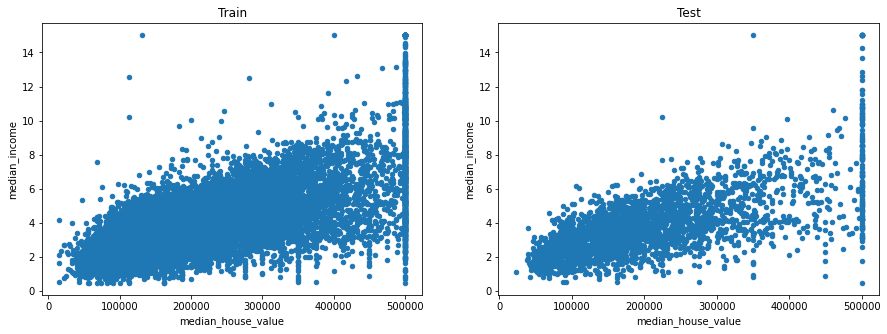

In [125]:
fig, axes = plt.subplots(ncols =2, figsize=(15, 5))
df_train.plot(y = "median_income", x = "median_house_value", kind = "scatter", ax = axes[0], title="Train")
df_test.plot(y = "median_income", x = "median_house_value", kind = "scatter", ax = axes[1], title="Test")
plt.show()

### 6. Split california_housing_train into training and validation set
Set seed: 42 and validation size 10%
### What does the “seed” part do here?
The seed() method is used to initialize the random number generator.

The random number generator needs a number to start with (a seed value), to be able to generate a random number.

If you use the same seed value twice you will get the same random number twice.

In [126]:
y = df_train["median_house_value"]
X = df_train.copy().drop(columns = ["median_house_value"])
X_test = df_test.copy().drop(columns = ["median_house_value"])
y_test = df_test["median_house_value"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

### 7. Build a Linear Regression model on the training set to predict: 'median_house_value'.

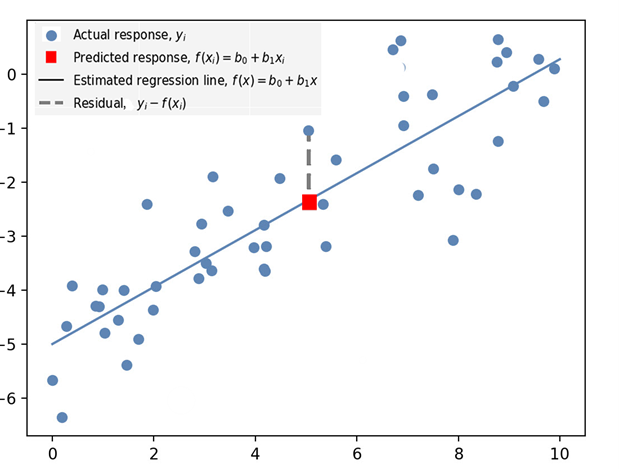

In [127]:
display.Image("https://cdn.activestate.com/wp-content/uploads/2021/03/Model-linear-regressions-figure.png")

### Basic Linear Regression

Score is the R2 = (sum of squared regression)/ (sum of squared total)

A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

In [128]:
reg = LinearRegression().fit(X_train, y_train)
def loss(model,x,y, text):
    print("The "+text+" loss is %.3f" % r2_score(model.predict(x), y))

In [129]:
loss(reg,X_train, y_train,"train")
loss(reg,X_val, y_val, "validation")
loss(reg,X_test, y_test, "test")

The train loss is 0.440
The validation loss is 0.414
The test loss is 0.409


## Improvements:
- Understanding data, cleaning and augmentation if necessery
- Feature scaling for numerical variables 
- Adding regularization (lasso, ridge, elasticnet) to linear fit
- Using k-fold cross validation to avoid overfitting
- Using grid search  for regularization parameter adjustment

### Understanding the Dataset

In [130]:
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" distribution",color='red')
        mu = dataframe[feature].mean()
        median = np.median(dataframe[feature])
        max = dataframe[feature].max()
        textstr = '\n'.join((
            r'mean=%.2f' % (mu, ),
            r'median=%.2f' % (median, ),
            r'max=%.2f' % (max, )))
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.65, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    fig.tight_layout()  
    plt.show()

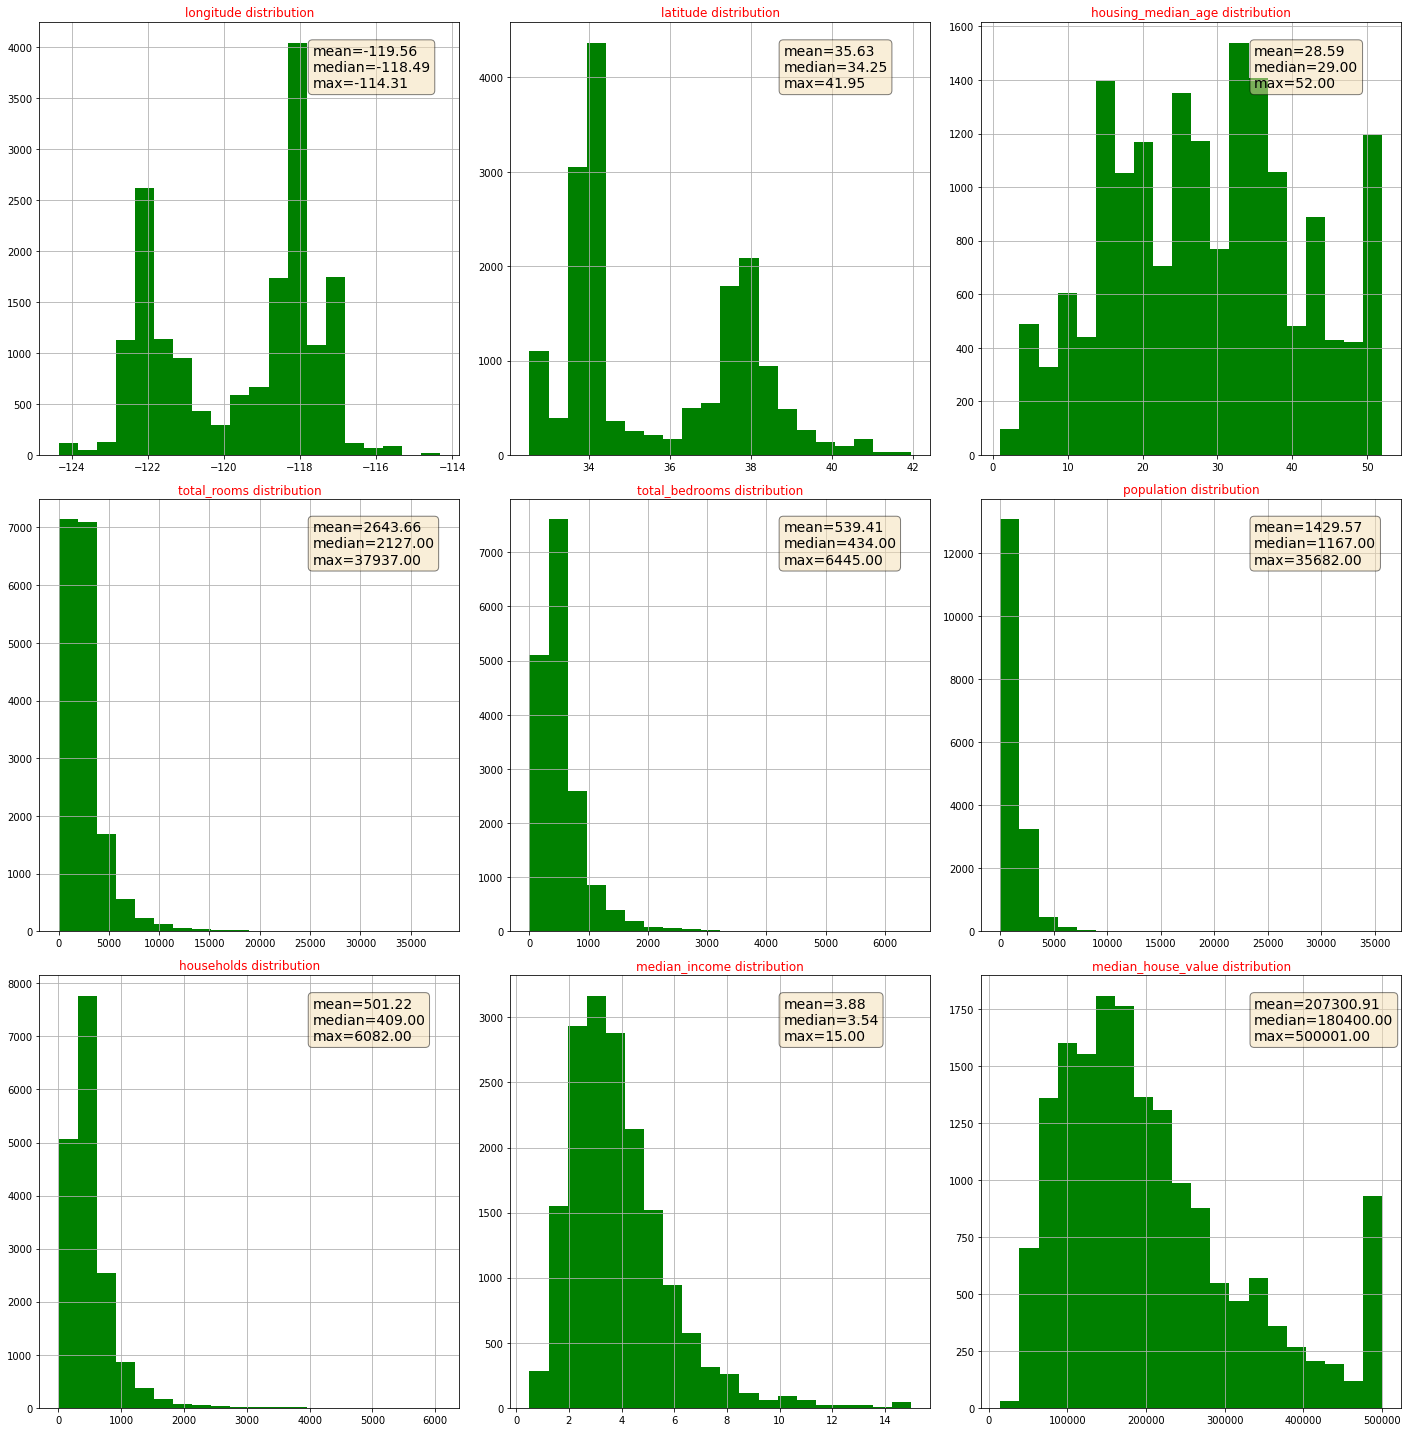

In [131]:
histograms_plot(df_train, df_train.columns, 3,3)

Since I already checked the null values and data types of the columns in the given dataset I plotted the histograms for  each column to understand the distributions. From the plots, we can check if  some anomalies present in the data. 

The geological data below shows that house value is higher in coastal areas so, I also need to consider the locational data. 

In [132]:
fig = px.scatter_geo(df_train,
                    lat="latitude",
                    lon="longitude", color="median_house_value")
fig.show()

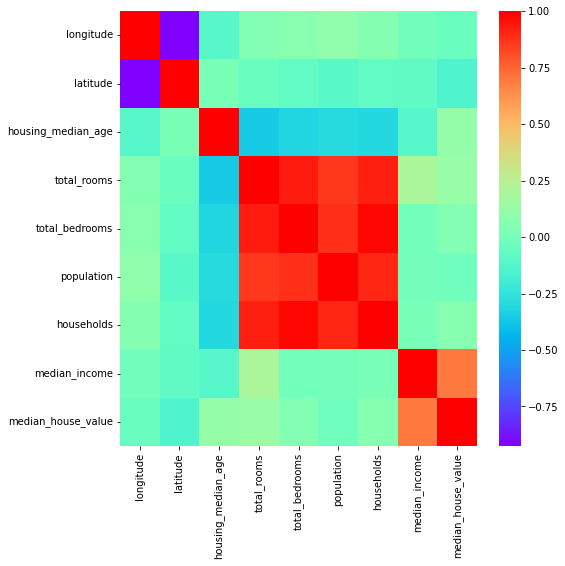

In [133]:
corrmat = df_train.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

### Feature Scaling

In our case, total_rooms, total_bedrooms and total_population variables are extremely dominant in scale compared to the other variables. When the data is not scaled, numerically large values can cause a bias in the models. To avoid the bias, I will use scaling. In order to avoid data leakage, I cannot use the scale of variables for test set and there are no limitations for the scales of each variable. Therefore using min-max scaling is not logical. I will use standard scaler for my pipeline. 

### Creating pipeline 
The first model including standartisation shows that linear model does not biased. 

ElasticNetCV model shows that penalty aplying to the model does not necessery and did not increase the score

alpha: 0.001000

l1_ratio_: 0.160000

l2_ratio_: 0.000420

After the grid search with 10-fold cross-validation (10% for validation), I observed that the best model can be reachable with 3rd degree polinomial features. 

|    | LM | LM with normalisation | LM with Polinomial Features(d = 3)|
| :- | -: | :- | -: |  
| Train loss| 0.440| 0.440 | 0.650 | 
| Test loss| 0.409 | 0.409 | 0.569 |


In [134]:
from sklearn.pipeline import Pipeline

lm_1 = Pipeline([
    ('normalizer', StandardScaler()),
    ('regressor', LinearRegression())
]).fit(X_train, y_train)
    
loss(lm_1,X_train, y_train,"train")
loss(lm_1,X_val, y_val, "validation")
loss(lm_1,X_test, y_test, "test")

The train loss is 0.440
The validation loss is 0.414
The test loss is 0.409


In [135]:
ratios = np.arange(0, 1, 0.01)
alphas = [ 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0]
elastic_net = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=10, random_state=42)
elastic_net.fit(X_train, y_train)

print('alpha: %f' % elastic_net.alpha_)
print('l1_ratio_: %f' % elastic_net.l1_ratio_)
l2_ratio_ = 0.5 * elastic_net.alpha_ * (1 - elastic_net.l1_ratio_)
print("l2_ratio_: %f" % l2_ratio_)

alpha: 0.001000
l1_ratio_: 0.160000
l2_ratio_: 0.000420


In [136]:
lm_2 = ElasticNet(alpha = elastic_net.alpha_, l1_ratio = elastic_net.l1_ratio_).fit(X_train, y_train)
    
loss(lm_2,X_train, y_train,"train")
loss(lm_2,X_val, y_val, "validation")
loss(lm_2,X_test, y_test, "test")

The train loss is 0.439
The validation loss is 0.413
The test loss is 0.409


In [138]:
degrees = [1, 2, 3, 4] # Change degree "hyperparameter" here
best_score = 0
best_degree = 0
for degree in degrees:
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(X_train)
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(X_train_poly, y_train)
    scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=10) # Change k-fold cv value here
    if max(scores) > best_score:
        best_score = max(scores)
        best_degree = degree
print("Best degree for the polinomial features is",best_degree)

Best degree for the polinomial features is 3


In [139]:
poly_features = PolynomialFeatures(degree = best_degree)
X_train_poly = poly_features.fit_transform(X_train)
lm_3 = polynomial_regressor.fit(X_train_poly, y_train)

loss(lm_3,X_train_poly, y_train,"train")
loss(lm_3,poly_features.fit_transform(X_test), y_test, "test")

The train loss is 0.650
The test loss is 0.569


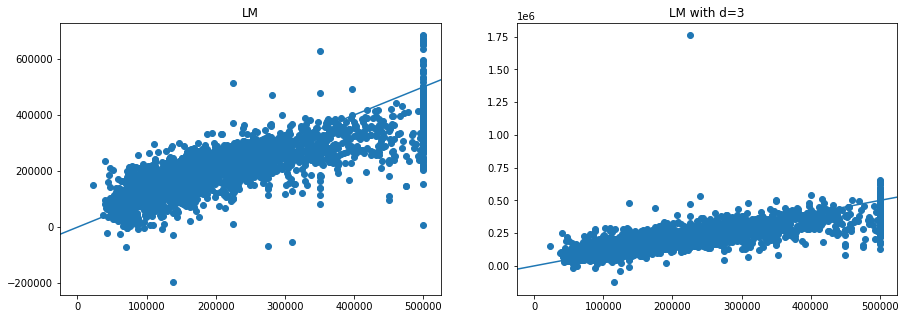

In [166]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].scatter(y = reg.predict(X_test) , x = y_test.values)
ax[0].axline((0, 0), slope=1)
ax[0].set_title("LM")
ax[1].scatter(y = lm_3.predict(poly_features.fit_transform(X_test)), x = y_test.values)
ax[1].axline((0, 0), slope=1)
ax[1].set_title("LM with d=3")
plt.show()

## Questions from 8 to 10

### 8. List some differences between supervised and unsupervised learning and give an example of each type

The main difference between supervised and unsupervised learning: Labeled data

| Supervised Learning | Unsupervised Learning  |
| :- | -: | 
| Labeled data | Unlabeled data |
| Predict outcome | Gain insight | 
| Not demending as unsupervised | Needs large training sets | 
| Regression - Classification | Clustering - Association | 


### 9. You are provided with two tables. Write a SQL query that lists down all the orders with customer information
“Order table” and “Customer table”

Order table has fields : OrderID, CustID, OrderNumber, Amount

Customer table has fields : ID, FirstName,LastName,City

    SELECT O.OrderID, O.CustID, O.OrderNumber, O.Amount, C.FirstName, C.LastName, C.City
        FROM Order AS O
        LEFT JOIN Customer AS C 
        ON C.ID = O.CustID
        ORDER BY O.OrderID ASC;

### 10. How would you deal with unbalanced binary classification?
- Resampling the training set (under sampling or over sampling) to balance the size of the abundant class
- Ensambling different resampled datasets with many chunk trainings
- Resampling with different ratios of the abundant class
- Using models suited for imbalanced data (like XGBoost )
- Using the evaluations metrics properly